we will apply some techniques we saw in the lectures about feature compression, clustering and generative models. We'll start by loading some of the libraries that we'll need.

Note that comments in the coding exercise cells below just serve as hints and are not requirements for your own code.

In [1]:
# plt to plot figures
import matplotlib.pyplot as plt
# numpy for array/matrix operations
import numpy as np
# loading the dataset loader function from sklearn
from sklearn.datasets import load_wine

# we set a seed variable for functions that use randomization (e.g. when shuffling data samples)
# this way, we can have reproducible results even with randomization
RANDOM_STATE = 2

### 0.1) Dataset

In this exercise sheet, we'll use the Wine dataset. From the description:

"The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine."

The code below should be familiar from the 1st exercise sheet.

In [3]:
# loading the sklearn data object (python dictionary-style object)
data = load_wine()
#data = load_breast_cancer()

In [4]:
# Unrelated but maybe helpful: show class type of data (might clarify how to work with it)
print("Type of data: ", type(data))

# Check number and name of classes
print("Number of classes: ", len(np.unique(data['target'])))
print("Class names: ", data.target_names)

# features, target = data.data, data.target
X_all, y_all = data.data, data.target
# or with: features, target = load_breast_cancer(return_X_y=True)

print("Number of samples: ", X_all.shape[0])
print("Number of features: ", X_all.shape[1])

# extra
print(data.keys())
print("data shape: ", X_all.shape)
print("target shape: ", y_all.shape)
print("sample data:\n", X_all[0:2])
print("sample targets:\n", y_all[0:2])

print("-----------------------")
# print(data.target==0)
# print(X_all[data.target==1])
print("-----------------------")
print(X_all[data.target==0, 12])  # feature 12 values, of class 0 samples
print((X_all[data.target==0, 12]).shape)

Type of data:  <class 'sklearn.utils._bunch.Bunch'>
Number of classes:  3
Class names:  ['class_0' 'class_1' 'class_2']
Number of samples:  178
Number of features:  13
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
data shape:  (178, 13)
target shape:  (178,)
sample data:
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]]
sample targets:
 [0 0]
-----------------------
-----------------------
[1065. 1050. 1185. 1480.  735. 1450. 1290. 1295. 1045. 1045. 1510. 1280.
 1320. 1150. 1547. 1310. 1280. 1130. 1680.  845.  780.  770. 1035. 1015.
  845.  830. 1195. 1285.  915. 1035. 1285. 1515.  990. 1235. 1095.  920.
  880. 1105. 1020.  760.  795. 1035. 1095.  680.  885. 1080. 1065.  985.
 1060. 1260. 1150. 1265. 1190. 1375. 1060. 1120.  970. 127

In [5]:
# What kind of features?
print("Feature names:\n")
for idx, feature_name in enumerate(data.feature_names):
    print(idx, feature_name)

Feature names:

0 alcohol
1 malic_acid
2 ash
3 alcalinity_of_ash
4 magnesium
5 total_phenols
6 flavanoids
7 nonflavanoid_phenols
8 proanthocyanins
9 color_intensity
10 hue
11 od280/od315_of_diluted_wines
12 proline


In [6]:
# sklearn contains a function that can shuffle and split the data into test and train sets
from sklearn.model_selection import train_test_split

# Make a train/test split using 20% test size; shuffle the data before sampling
# don't forget to set the random seed in the function

### YOUR CODE HERE START
# X_all -> features , y_all -> targets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=RANDOM_STATE)

# print the number of train and test samples
print("Number of train samples: \n", X_train.shape[0])
print("Number of test samples: \n", X_test.shape[0])

print("shape of train samples set: \n", X_train.shape)
print("shape of test samples set: \n", X_test.shape)

Number of train samples: 
 142
Number of test samples: 
 36
shape of train samples set: 
 (142, 13)
shape of test samples set: 
 (36, 13)


## 1) Principal Component Analysis


### 1.1) Data Visualization
PCA can be used to help visualize your data by projecting high-dimensional feature spaces to lower-dimensional feature spaces. Let's try this here.

#### Use PCA to transform your data and project it to a 2-dimensional space. Visualize the result as a scatter plot.

check shape of X_train = (142, 13)

(142, 2)


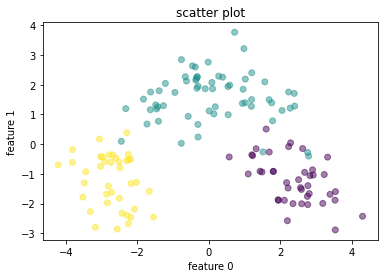

In [7]:
# set random seed for numpy (sklearn uses numpy's RNG)
np.random.seed(RANDOM_STATE)
# import PCA class
from sklearn.decomposition import PCA
# import class used to apply z-normalization on your dataset
from sklearn.preprocessing import StandardScaler

### YOUR CODE HERE 
# instantiate the scaler
scaler = StandardScaler()

# use the scaler's fit method to calculate mean and standard deviation of your train(!) set 
scaler.fit(X_train)

# apply transform method to standardize your data subsets
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
print("check shape of X_train =", X_train_standardized.shape)
print("")
# run PCA and transform your data
pca = PCA(n_components=2)
tf_X_train = pca.fit_transform(X_train_standardized)

print(tf_X_train.shape)

# plot of two features (2D) after using PCA
plt.scatter(tf_X_train[:,0],tf_X_train[:,1],c=y_train,alpha=0.5,cmap='viridis')
plt.title('scatter plot')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()
### YOUR CODE HERE END

### Alternative method

In [8]:
def pca(data):
    # Calculate Covariance Matrix
    cov=np.cov(data.T)
    # Calculate Eigenvalues and Eigenvectors
    w, v = np.linalg.eig(cov)
    print("w =\n", w)
    print("v =\n", v.shape)
    # Sort them
    s= np.argsort(w)[::-11]
    # k=np.argsort(w)
    # print("s =", s)
    # print("k =", k)
    return v[:,s]

eig = pca(X_all)
print(eig.shape)

w =
 [9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 8.20370314e-03 2.10723661e-02 3.75759789e-02
 7.17026032e-02]
v =
 (13, 13)
(13, 2)


### 1.2) Feature Compression

PCA is also used for feature compression. This can e.g. improve the training/run time of your model while still reaching similar performances compared to using uncompressed feature vectors.

#### Run PCA on your z-normalized train dataset. 
####  Determine the lowest number of principal components that result in explaining >80% of the variance in the train dataset. 

In [9]:
# set random seed for numpy (sklearn uses numpy's RNG)
np.random.seed(RANDOM_STATE)
# import PCA class
from sklearn.decomposition import PCA


### YOUR CODE HERE
# fit PCA
pca = PCA(n_components=13)
pca.fit(X_train_standardized)
var_per = pca.explained_variance_ratio_
print(var_per)

# determine the lowest number of components necessary to reach >80% variance
sel = 13
for n in range(13):
      if sum(var_per[0:n])>0.80:
            component_count = n
            break
print(component_count)
explained_variance = sum(var_per[0:component_count])*100
# print(sum(var_per[0:5]))
### YOUR CODE HERE END


# print the number of principal components and explained variance
print("Number of principal components that explain {:.2f} of the variance: {}" \
      .format(explained_variance, component_count))


[0.3616339  0.19855673 0.11266077 0.07297754 0.06074288 0.04312049
 0.04068351 0.02941866 0.02482837 0.01864432 0.01573694 0.01353453
 0.00746135]
5
Number of principal components that explain 80.66 of the variance: 5


### 1.3) Experiments

Let's now train a kNN classifier with and without PCA-based feature compression and compare the results.

#### Train and evaluate kNN (k=5) with 10-fold cross-validation, using the original given features. Then do the same with PCA-compressed features (using the number of PCA-components determined in T1.3 - note: alternatively use some random small number). Compare mean accuracy results. Hint: Feel free to copy&modify code from the first exercise sheet.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
np.random.seed(RANDOM_STATE)

def chance_cal(reference):
    classes,occs = np.unique(reference, return_counts=True)
    return float(np.max(occs))/len(reference)


### YOUR CODE HERE


kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
# create the splits with KFold's get_n_splits method
kf.get_n_splits()
...
# we initialize an empty list to store accuracy numbers for each split
acc_list = []
# run KNN training, testing and accuracy evaluation for each split
for split_n, (train_index, test_index) in enumerate(kf.split(X_all), 1):
    X_train_split, X_test_split = X_all[train_index], X_all[test_index]
    y_train_split, y_test_split = y_all[train_index], y_all[test_index]

    scaler = StandardScaler()
    scaler.fit(X_train_split)

    X_train_split_standardized = scaler.transform(X_train_split)
    X_test_split_standardized = scaler.transform(X_test_split)

    knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
    knn.fit(X_train_split_standardized, y_train_split)
    ...
    precdict_output = knn.predict(X_test_split_standardized)
    # acc = knn.score(X_test_split_standardized, y_test_split)*100  # accuracy as a precentage
    acc = accuracy_score(y_test_split, precdict_output)*100  # accuracy as a precentage
    acc_list.append(acc)

    # chance level of the current test set
    chance_level = chance_cal(y_test_split)*100  # as a percentage

    # print acc and chance level for each split
    print("Split-Nr {:02}\tAcc (Chance): {:.2f}% ({:.2f}%)".format(split_n, acc, chance_level))

# print mean and standard deviation of accuracy over all splits
print("\nAccuracy mean (std) over 10 folds: {:.2f}% ({:.2f})".format(np.mean(acc_list), np.std(acc_list)))


print("------------------- with PCA --------------------------------------")

pca = PCA(n_components=5)


# we initialize an empty list to store accuracy numbers for each split
acc_list = []
# run KNN training, testing and accuracy evaluation for each split
for split_n, (train_index, test_index) in enumerate(kf.split(X_all), 1):
    X_train_split, X_test_split = X_all[train_index], X_all[test_index]
    y_train_split, y_test_split = y_all[train_index], y_all[test_index]

    scaler = StandardScaler()
    scaler.fit(X_train_split)

    X_train_split_standardized = scaler.transform(X_train_split)
    X_test_split_standardized = scaler.transform(X_test_split)

    # perform PCA -----------------------------------
    pca_obj = pca.fit(X_train_split_standardized)
    X_train_split_standardized = pca.fit_transform(X_train_split_standardized)
    X_test_split_standardized = pca_obj.transform(X_test_split_standardized)
    # ---------------------------------------

    knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
    knn.fit(X_train_split_standardized, y_train_split)
    ...
    precdict_output = knn.predict(X_test_split_standardized)
    # acc = knn.score(X_test_split_standardized, y_test_split)*100  # accuracy as a precentage
    acc = accuracy_score(y_test_split, precdict_output)*100  # accuracy as a precentage
    acc_list.append(acc)

    # chance level of the current test set
    chance_level = chance_cal(y_test_split)*100  # as a percentage

    # print acc and chance level for each split
    print("Split-Nr {:02}\tAcc (Chance): {:.2f}% ({:.2f}%)".format(split_n, acc, chance_level))

# print mean and standard deviation of accuracy over all splits
print("\nAccuracy mean (std) over 10 folds: {:.2f}% ({:.2f})".format(np.mean(acc_list), np.std(acc_list)))


Split-Nr 01	Acc (Chance): 100.00% (55.56%)
Split-Nr 02	Acc (Chance): 100.00% (44.44%)
Split-Nr 03	Acc (Chance): 100.00% (61.11%)
Split-Nr 04	Acc (Chance): 88.89% (44.44%)
Split-Nr 05	Acc (Chance): 100.00% (44.44%)
Split-Nr 06	Acc (Chance): 100.00% (61.11%)
Split-Nr 07	Acc (Chance): 100.00% (44.44%)
Split-Nr 08	Acc (Chance): 83.33% (38.89%)
Split-Nr 09	Acc (Chance): 100.00% (41.18%)
Split-Nr 10	Acc (Chance): 94.12% (41.18%)

Accuracy mean (std) over 10 folds: 96.63% (5.68)
------------------- with PCA --------------------------------------
Split-Nr 01	Acc (Chance): 94.44% (55.56%)
Split-Nr 02	Acc (Chance): 100.00% (44.44%)
Split-Nr 03	Acc (Chance): 100.00% (61.11%)
Split-Nr 04	Acc (Chance): 88.89% (44.44%)
Split-Nr 05	Acc (Chance): 100.00% (44.44%)
Split-Nr 06	Acc (Chance): 100.00% (61.11%)
Split-Nr 07	Acc (Chance): 100.00% (44.44%)
Split-Nr 08	Acc (Chance): 94.44% (38.89%)
Split-Nr 09	Acc (Chance): 100.00% (41.18%)
Split-Nr 10	Acc (Chance): 100.00% (41.18%)

Accuracy mean (std) over 10

## 2) Clustering: K-Means

The k-means algorithm is an iterative algorithm that tries to partition the dataset into k pre-defined distinct non-overlapping clusters where each data point belongs to only one cluster. One of the applications of k-means is vector quantization. 

In this exercise, we'll use k-means to perform color quantization to an image. k-means will find a small number (=k) of representative colors within the given picture. Each pixel in the image yields a 3-dimensional pattern in the RGB color space. Using k-means we can cluster all the pixels of an image into k clusters and then assign each pixel the color represented by its nearest cluster center. Thereby, an image containing millions of colors can be compressed to an image containing k different colors only.

####  Fit k-means with k=64 on the given image. Predict the nearest cluster center for all pixels in the image. Recreate the image and visualize it.
####  Your task: Do the same with an image of your choice.

china_shape =  (427, 640, 3)
china =
 [[[0.68235294 0.78823529 0.90588235]
  [0.68235294 0.78823529 0.90588235]]]
china_new_shape =  (273280, 3)
china =
 [[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]]
labs =  [34 34 34 ... 26  2  2]


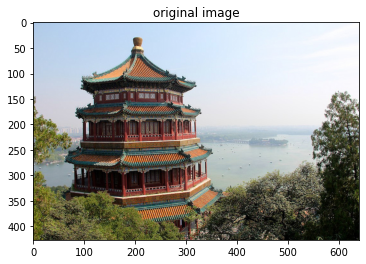

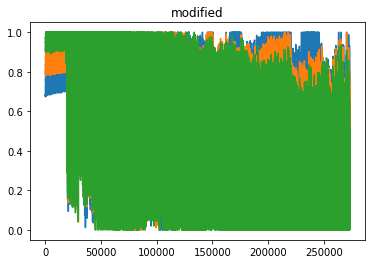

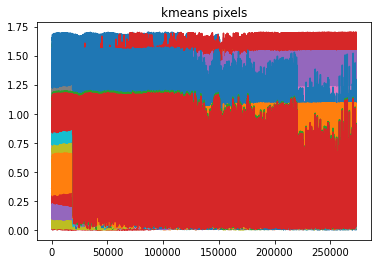

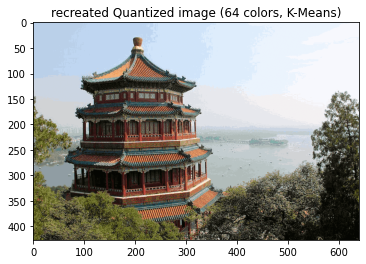

In [29]:
from sklearn.cluster import KMeans
# for loading the image from sklearn
from sklearn.datasets import load_sample_image
# for shuffling input to k-means fit method (optional: faster if subset of all pixels are sampled instead of using full image)
from sklearn.utils import shuffle

np.random.seed(RANDOM_STATE)

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Normalize color values to be in the range of [0-1] instead of [0-255]
china = np.array(china, dtype=np.float64) / 255
print("china_shape = ", china.shape)
print("china =\n", china[0:1,0:2,:])

### YOUR CODE HERE 
# transform to a 2D numpy array of shape (n,3) with "3" containing RGB color intensities
china_X = np.reshape(china, (-1,3))
print("china_new_shape = ", china_X.shape)
print("china =\n", china_X[0:2,:])

china_X_sample = shuffle(china_X, random_state=RANDOM_STATE, n_samples=1_000)
# Fitting the kmeans model (k=64), optionally do this only on a small sub-sample of the data if it takes too long with full image
km = KMeans(n_clusters=64, max_iter=300).fit(china_X_sample)

# Get labels for all points
# labels = km.labels_  # this does not provide correct labels since only a sample is used for fit
# print("km labels =", km.labels_)
# Predicting color indices on the full image (k-means)
labels = km.predict(china_X)   # this is the correct one
print("labs = ", labs)

# recreate the (compressed) image using labels and kmeans cluster centers
cluster_centers = km.cluster_centers_
out = km.transform(china_X)


h = 427 # x cordinates
w = 640 # y cordinates
def recreate_image(codebook, labels, h, w):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(h, w, -1)

# visualize the original image and the newly created image with 64 colors
plt.figure(1)
plt.title('original image')
plt.imshow(china)

plt.figure(2)
plt.title('modified')
plt.plot(china_X)

plt.figure(3)
plt.title('kmeans pixels')
plt.plot(out)
### YOUR CODE HERE END
plt.show()


plt.figure(4)
plt.clf()
# plt.axis("off")
plt.title(f"recreated Quantized image ({64} colors, K-Means)")
plt.imshow(recreate_image(cluster_centers, labels, h, w))
### YOUR CODE HERE END
plt.show()

In [57]:
print(cluster_centers.shape)
print(cluster_centers[0:2])
print(labs)
# print(labs.shape)
# plt.scatter(out[0], out[0], c=cluster_centers, cmap='viridis')


(64, 3)
[[0.97010571 0.97436705 0.99230268]
 [0.27555357 0.26630852 0.2294474 ]]
[ 9  9  9 ... 26 52 21]


## 3) Gaussian Mixture Model

For this exercise, we'll use GMMs to separate background from foreground (here:flower) in a given image. Take a look at the image below.

You'll need to estimate two mixtures of Gaussians to model the densities of the foreground and background pixels based on their color intensity. Then, apply the estimated models to the input image and segment the foreground and background regions.

#### Write a method that selects all pixel values inside a specified bounding box (given by the coordinates of the top-left and bottom-right corners) that is containing the foreground region. Train a GMM for the foreground class using all pixels inside this bounding box. 

#### Train a GMM for the background class using all pixels OUTSIDE the bounding box used in T3.1.

#### Compute the binary segmentation of the input image by making use of the two fitted GMMs. Then visualize this as a black&white image.


Hint: Results are best if the bounding box mostly contains flower (=the foreground region). Comments below can serve as pointers for your own code (not a requirement). 

<class 'numpy.ndarray'>


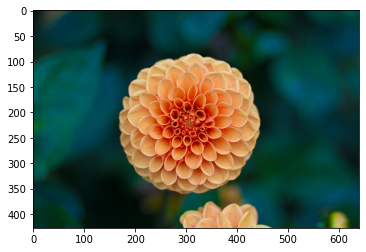

In [37]:
from sklearn.datasets import load_sample_image
# load the image from sklearn database
image = load_sample_image("flower.jpg")
print(type(image))

# take a look at the image
plt.imshow(image)
plt.show()

(427, 640, 3)
mask shape (427, 640)
mask: 
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
(427, 1)
(1, 640)


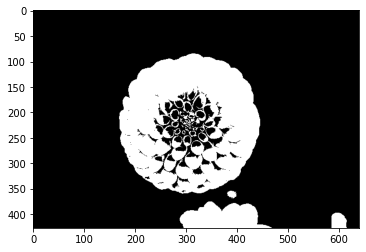

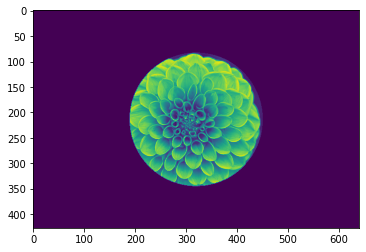

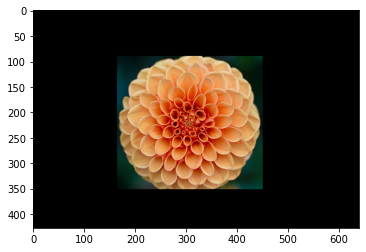

In [52]:
print(image.shape)
import skimage
from skimage import filters
from skimage.color import rgb2gray
import cv2

gray_img = rgb2gray(image)


val = filters.threshold_otsu(gray_img)
mask = gray_img < val
# plt.imshow(gray_img)
print("mask shape", mask.shape)
print("mask: \n", mask[0:2])
plt.figure(1)
plt.imshow(mask, cmap=plt.cm.binary)

plt.figure(2)
image_edit = gray_img
lx, ly = image_edit.shape
X, Y = np.ogrid[0:lx, 0:ly]
print(X.shape)
print(Y.shape)
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 16   # consider area of a circle
# mask = ( ((X-100)**2 + (Y)**2 )**0.5 ) * ( ((X)**2 + (X-200)**2 )**0.5 ) > 250*250
image_edit[mask]=0
plt.imshow(image_edit)

plt.figure(3)
image_edit = image

#create a blank image using np.zeros()
blank = np.zeros(image_edit.shape[:2], dtype="uint8")

#draw rectangle on the blank image
mask = cv2.rectangle(blank, (165, 90), (450, 350), (255, 255, 255), -1)

#Passing the mask to the bitwise_and gives intersection point of the mask and the image
maskimage= cv2.bitwise_and(image_edit, image_edit, mask=mask)
plt.imshow(maskimage)

fg image: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


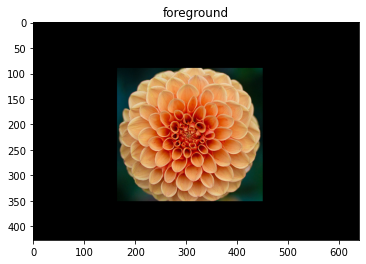

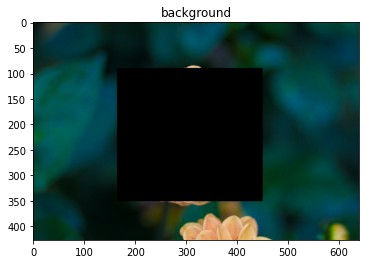

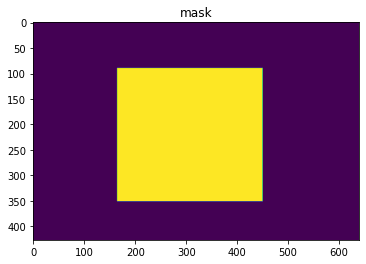

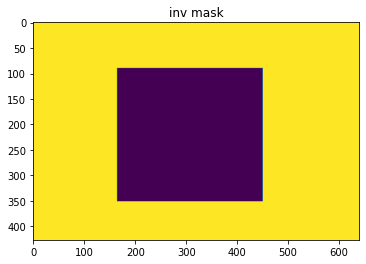

In [88]:
import copy
import matplotlib.patches as patches
import cv2

# load the image from sklearn database
image = load_sample_image("flower.jpg")
image_edit = image

### YOUR CODE HERE 
# function that returns mask for the bounding box
def mask_creation(x1=165,x2=450,y1=90,y2=350):
    #create a blank image using np.zeros()
    blank = np.zeros(image_edit.shape[:2], dtype="uint8")
    #draw rectangle on the blank image
    mask = cv2.rectangle(blank, (x1, y1), (x2, y2), (255, 255, 255), -1)
    return mask

# inverse: return mask for NOT(bounding box)
def inv_mask_creation(x1=165,x2=450,y1=90,y2=350):
    #create a blank image using np.zeros()
    blank = np.zeros(image_edit.shape[:2], dtype="uint8")
    #draw rectangle on the blank image
    mask = cv2.rectangle(blank, (x1, y1), (x2, y2), (255, 255, 255), -1)
    mask = cv2.bitwise_not(mask, mask)
    return mask

# define a bounding box for the flower (x1,x2,y1,y2) with 0 origin of coordinates in upper left corner
inv_mask = inv_mask_creation(x1=165,x2=450,y1=90,y2=350)

# get foreground (center flower) mask
mask = mask_creation(x1=165,x2=450,y1=90,y2=350)

bg= cv2.bitwise_and(image_edit, image_edit, mask=inv_mask)
fg= cv2.bitwise_and(image_edit, image_edit, mask=mask)

plt.figure(1)
plt.title('foreground')
plt.imshow(fg)
# take a look

# get background (not center flower) mask
plt.figure(2)
plt.title('background')
plt.imshow(bg)
### YOUR CODE HERE END
# take a look
# plt.imshow(bg)
plt.figure(3)
plt.title('mask')
plt.imshow(mask)


plt.figure(4)
plt.title('inv mask')
plt.imshow(inv_mask)

# check the fg image array
print("fg image:", fg[0:2]) # chcek the backgound is actually 0

(427, 640, 3)
fg_resized shape: (273280, 3)
fg_selected shape (74646, 3)
bg_selected shape (198634, 3)


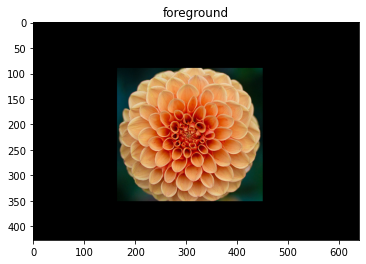

In [99]:
from sklearn.mixture import GaussianMixture
np.random.seed(RANDOM_STATE)

### YOUR CODE HERE
# Normalize color values to be in the range of [0-1] instead of [0-255]
image_edit = image
fg= cv2.bitwise_and(image_edit, image_edit, mask=mask)
bg= cv2.bitwise_and(image_edit, image_edit, mask=inv_mask)
fg = np.array(fg, dtype=np.float64) / 255
bg = np.array(bg, dtype=np.float64) / 255
print(fg.shape)
plt.figure(1)
plt.title('foreground')
plt.imshow(fg)
# transform all image variants to a 2D numpy array

fg_resized = np.reshape(fg, (-1, 3))
bg_resized = np.reshape(bg, (-1, 3))
print("fg_resized shape:", fg_resized.shape)

# select only elements that match the mask (=where the values are not zero)
# fg_selected = fg_resized[fg_resized!=[0,0,0]]
# print("fg_selected shape", fg_selected.shape)

# fg_not_selected = fg_resized[fg_resized==0]
# print("fg_not_selected shape", fg_not_selected.shape)
fg_selected = []
for i in fg_resized:
    if (all( [v == 0 for v in i] )):
        pass
    else:
        fg_selected.append(i)
fg_selected = np.asarray(fg_selected, dtype=np.float64)
print("fg_selected shape", fg_selected.shape)


bg_selected = []
for i in bg_resized:
    if (all( [v == 0 for v in i] )):
       pass
    else:
        bg_selected.append(i)
bg_selected = np.asarray(bg_selected, dtype=np.float64)
print("bg_selected shape", bg_selected.shape)
# make sure the number of selected elements matches the total number of elements in the image 


# train the foreground GMM (flower)
gm1 = GaussianMixture(n_components=2, random_state=RANDOM_STATE).fit(fg_selected)

# train the background GMM (rest)
gm2 = GaussianMixture(n_components=2, random_state=RANDOM_STATE).fit(bg_selected)

### YOUR CODE HERE END

image_resized shape: (273280, 3)
log1: -687373.643058703 and log2: -387028.5773876001
predictions_gm1 shape (273280,)
predictions_gm1 shape (427, 640, 1)


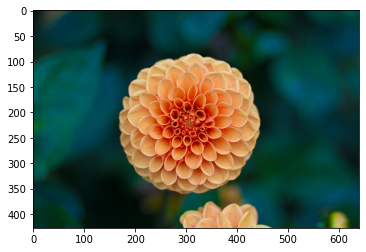

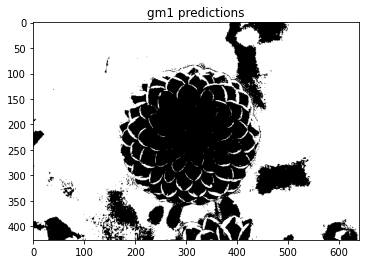

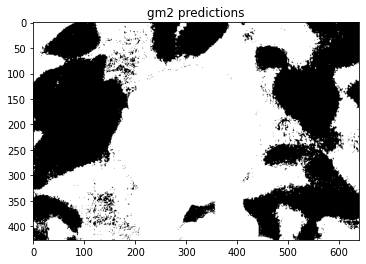

In [118]:
### YOUR CODE HERE
# get likelihood scores from both models for each pixel in the image
plt.figure(1)
plt.imshow(image)
image_resized = np.reshape(image, (-1, 3))
print("image_resized shape:", fg_resized.shape)
log1 = gm1.score(image_resized)
log2 = gm2.score(image_resized)
print("log1: {} and log2: {}".format(log1,log2))

# determine which pixel belongs to which class (foreground/background)
predictions_gm1 = gm1.predict(image_resized)
predictions_gm2 = gm2.predict(image_resized)

print("predictions_gm1 shape", predictions_gm2.shape)

h = 427 # x cordinates
w = 640 # y cordinates
predictions_gm1 = np.reshape(predictions_gm1, (h, w, -1))
predictions_gm2 = np.reshape(predictions_gm2, (h, w, -1))
print("predictions_gm1 shape", predictions_gm2.shape)
# visualize the result as a black/white image (0=fg=white), (1=bg=black)
plt.figure(2)
plt.title('gm1 predictions')
plt.imshow(predictions_gm1, cmap=plt.cm.binary)

plt.figure(3)
plt.title('gm2 predictions')
plt.imshow(predictions_gm2, cmap=plt.cm.binary)
# plt.imshow()
### YOUR CODE HERE END
plt.show()

4.1) What is the curse of dimensionality?  
curse of dimensionality describes the rapid increase of volume when adding additional dimensions in a
mathematical space, this increment grows exponentially with number of features(with additioal features). Furthermore, the number of required training data increases dramatically with this increasing dimensions. For example, in the field of cancer research; age, number of cancerous nodes can be used as features to define the prognosis of the cancer patient. These features constitute the dimensions of a feature vector. But other factors like past surgeries, patient history, type of tumor etc. also help a doctor to better determine the prognosis. But addition of these extra features will increase the complexity and training time significatly, required traning data are also increased.



4.2) What does PCA mean and what does it do (1 sentence)?  
PCA is a statistical procedure used for feature compression that searches gradual orthogonal directions (in the multidimensional feature space) with the highest Variance and returns the orderes by their variance respectively.


4.3) What are the steps to calculate PCA? (roughly)?  
Step 1: Standardize the dataset.  
Step 2: Calculate the covariance matrix.  
Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.  
Step 4: Sort eigenvalues and their corresponding eigenvectors.  
Step 5: Pick k eigenvalues and form a matrix of eigenvectors.  (select the eigen vectors with largest eigen values)  
Step 6: Transform the original matrix.  (product the feature matrix with the matrix of eigenvectors to get the compressed feature matrix)  


4.4) How is feature compression achieved with PCA?  
PCA finds the direction of the maximum variance and projects the data into lower dimensions using a new orthogonal basis of the feature space. PCA directions (the main components) form the new orthogonal basis of the feature space. In other words, PCA can be used to filter out the unwanted part of the data set (lowest variance components), to reflect most of the information of the original variable,thereby compress the features, and reconstruct the data set that meets the actual needs.


4.5) What is clustering in ML and what is it used for?  
clustering is an unsupervised machine learning process, that performs grouping of data objects with similar properties. In other words, clustering groups, objects based on identifying similarities between their features. Clustering don't need the availability of class labels(ground truth). Therefore, Clustering can be used when the ground truth data(labels) are not available, or when we don't now how many classes of data are there.


4.6) What does the K in K-Means mean?  
K-means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. Here k is the number of classes, which we'll assume (based on our experience/ knowledge about the dataset) in the dataset

4.7) What is the difference between discriminative and generative models? Give an example for each.  
discriminative model - Discriminate the feature space in decision space, discriminative models draw decison boundaries in the feature space. In discriminative model there are no attempt to model the underline probability distribution, discriminative model describe only the target variables. Compute probability of class, given sample directly.
eg:- Artificial Neural Networks, logistic regression, support vector machine, k-means, k nearest neighbor

generative models - Give the probability that sample was generated by the class (probability of the sample, given the class)
Generative models can be used to generate new data points
eg:- Gaussian Mixture Models, Naive Bayes classifiers

In other words, Generative models focuse on explaining how the data was generated, while a discriminative models focus on predicting the labels of the data
Discriminative models draw boundaries in the data space to identify tags and sorts data. Then trains the model by learning parameters that maximize the conditional probability P(Y|X) , on the other hand, generative models try to model how data is placed throughout the space and generate more data. In there, it trains parameters by maximizing the joint probability of P(X, Y). In brief, generative model focuses on how the data was generated, while a discriminative model focuses on predicting the labels of the data.

   * A practical example: In an application of classifying a speech to a language,  
    Generative: Learning several languages(Supervised Learning), and then classifying it using the knowledge gained
    Discriminative: Determining the difference in the linguistic models without learning the languages(Unsupervised learning), and then classifying the speech.

4.9) Shortly explain the E- and the M- step in the EM-algorithm.  
(E) Expectation Step: assignment of probabilities for the samples that belong to k different Gaussian distributions
                        in other words, for all samples compute the probability of a sample x<sub>i</sub>  that belongs to Gaussian k (compute for all samples)

(M) Maximization Step: this step Attempts to optimize the parameters of the Gaussian Mixture model to best explain the data, (weights and means are re-estimated)

